# Earnings Split By Gender

In [48]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,12

In [49]:
#pip install -U matplotlib

In [50]:
import warnings

warnings.filterwarnings('ignore')

In [51]:
df = pd.read_excel('Gender_Pay_Gap_Profession.xlsx', sheet_name = None)
df2 = pd.read_excel('Figure_3.xls')
df3 = pd.read_excel('Pay_Occupation.xlsx')
df4 = pd.read_excel('Figure_6.xls')

In [52]:
df.keys()

dict_keys(['All', 'FT', 'PT'])

In [53]:
all_time = df['All']
full_time = df['FT']
part_time = df['PT']

In [54]:
all_time.head()

,Description,Code,Hexo,Male hexo,Female hexo,Male jobs,Female jobs,Male AGP,Female AGP,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Chief executives and senior officials,111,40.15,43.33,37.23,70,34,83944,63915,NaN,Key,Statistical robustness
1,Production managers and directors,112,22.58,22.99,20.78,505,117,45000,35929,NaN,CV <= 5%,Estimates are considered precise
2,Functional managers and directors,113,28.91,32.74,25.44,492,401,63074,45469,NaN,CV > 5% and <= 10%,Estimates are considered reasonably precise
3,Financial institution managers and directors,115,23.53,25.53,20.91,51,39,x,x,NaN,CV > 10% and <= 20%,Estimates are considered acceptable
4,Managers and directors in transport and lo...,116,15.61,16.08,13.64,150,44,33423,27208,NaN,x = CV > 20%,Estimates are considered unreliable for practi...


In [55]:
full_time.head()

,Description,Code,FT hexo,Male FT hexo,Female FT hexo,Male FT jobs,Female FT jobs,Male AGP,Female AGP,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Chief executives and senior officials,111,44.41,46.98,39.8,59,29,94894,73098,NaN,Key,Statistical robustness
1,Production managers and directors,112,23.64,23.83,22.73,443,88,48826,41576,NaN,CV <= 5%,Estimates are considered precise
2,Functional managers and directors,113,30.81,33.87,27.23,449,323,67676,51102,NaN,CV > 5% and <= 10%,Estimates are considered reasonably precise
3,Financial institution managers and directors,115,24.15,25.56,21.71,50,32,x,x,NaN,CV > 10% and <= 20%,Estimates are considered acceptable
4,Managers and directors in transport and lo...,116,15.81,16.21,13.64,144,40,33808,29388,NaN,x = CV > 20%,Estimates are considered unreliable for practi...


In [56]:
part_time.head()

,Description,Code,PT hexo,Male PT hexo,Female PT hexo,Male PT jobs,Female PT jobs,Male AGP,Female AGP,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Chief executives and senior officials,111,25.86,x,x,11,x,x,x,NaN,Key,Statistical robustness
1,Production managers and directors,112,17.59,18.28,15.8,62,29,9935,11003,NaN,CV <= 5%,Estimates are considered precise
2,Functional managers and directors,113,19.65,20,19.39,43,78,12500,18914,NaN,CV > 5% and <= 10%,Estimates are considered reasonably precise
3,Financial institution managers and directors,115,14.83,NaN,14.85,..,7,0,x,NaN,CV > 10% and <= 20%,Estimates are considered acceptable
4,Managers and directors in transport and lo...,116,10,9.54,x,x,x,x,x,NaN,x = CV > 20%,Estimates are considered unreliable for practi...


In [57]:
df2.head()

,age group,18 to 21,22 to 29,30 to 39,40 to 49,50 to 59,over 60
0,1997,6.0,5.8,11.0,24.0,21.6,14.7
1,1998,6.7,5.6,10.6,24.8,21.6,17.3
2,1999,7.5,5.8,9.9,23.5,21.7,14.5
3,2000,5.7,5.2,10.2,22.9,21.0,13.2
4,2001,4.7,4.9,9.4,23.3,21.0,12.8


In [58]:
all_time.dtypes

Description     object
Code             int64
Hexo            object
Male hexo       object
Female hexo     object
Male jobs       object
Female jobs     object
Male AGP        object
Female AGP      object
Unnamed: 9     float64
Unnamed: 10     object
Unnamed: 11     object
dtype: object

In [59]:
#lets replace the x values to nans to be able to change the datatypes into a float 
all_time['Male hexo'].mask(all_time['Male hexo'] == 'x', 0, inplace=True)
all_time['Female hexo'].mask(all_time['Female hexo'] == 'x', 0, inplace=True)
all_time['Male jobs'].mask(all_time['Male jobs'] == 'x', 0, inplace=True)
all_time['Female jobs'].mask(all_time['Female jobs'] == 'x', 0, inplace=True)
all_time['Male AGP'].mask(all_time['Male AGP'] == 'x', 0, inplace=True)
all_time['Female AGP'].mask(all_time['Female AGP'] == 'x', 0, inplace=True)


part_time['Male PT hexo'].mask(part_time['Male PT hexo'] == 'x', 0, inplace=True)
part_time['Female PT hexo'].mask(part_time['Female PT hexo'] == 'x', 0, inplace=True)
part_time['Male PT jobs'].mask(part_time['Male PT jobs'] == 'x', 0, inplace=True)
part_time['Female PT jobs'].mask(part_time['Female PT jobs'] == 'x', 0, inplace=True)
part_time['Male AGP'].mask(part_time['Male AGP'] == 'x', 0, inplace=True)
part_time['Female AGP'].mask(part_time['Female AGP'] == 'x', 0, inplace=True)


full_time['Male FT hexo'].mask(full_time['Male FT hexo'] == 'x', 0, inplace=True)
full_time['Female FT hexo'].mask(full_time['Female FT hexo'] == 'x', 0, inplace=True)
full_time['Male FT jobs'].mask(full_time['Male FT jobs'] == 'x', 0, inplace=True)
full_time['Female FT jobs'].mask(full_time['Female FT jobs'] == 'x', 0, inplace=True)
full_time['Male AGP'].mask(full_time['Male AGP'] == 'x', 0, inplace=True)
full_time['Female AGP'].mask(full_time['Female AGP'] == 'x', 0, inplace=True)

In [60]:
all_time.isnull().values.any()

True

In [61]:
all_time['Male hexo'] = all_time['Male hexo'].fillna(0)
all_time['Female hexo'] = all_time['Female hexo'].fillna(0)
all_time['Male jobs'] = all_time['Male jobs'].fillna(0)
all_time['Female jobs'] = all_time['Female jobs'].fillna(0)
all_time['Male AGP'] = all_time['Male AGP'].fillna(0)
all_time['Female AGP'] = all_time['Female AGP'].fillna(0)

part_time['Male PT hexo'] = part_time['Male PT hexo'].fillna(0)
part_time['Female PT hexo'] = part_time['Female PT hexo'].fillna(0)
part_time['Male PT jobs'] = part_time['Male PT jobs'].fillna(0)
part_time['Female PT jobs'] = part_time['Female PT jobs'].fillna(0)
part_time['Male AGP'] = part_time['Male AGP'].fillna(0)
part_time['Female AGP'] = part_time['Female AGP'].fillna(0)

full_time['Male FT hexo'] = full_time['Male FT hexo'].fillna(0)
full_time['Female FT hexo'] = full_time['Female FT hexo'].fillna(0)
full_time['Male FT jobs'] = full_time['Male FT jobs'].fillna(0)
full_time['Female FT jobs'] = full_time['Female FT jobs'].fillna(0)
full_time['Male AGP'] = full_time['Male AGP'].fillna(0)
full_time['Female AGP'] = full_time['Female AGP'].fillna(0)



In [62]:
all_time.head()


,Description,Code,Hexo,Male hexo,Female hexo,Male jobs,Female jobs,Male AGP,Female AGP,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Chief executives and senior officials,111,40.15,43.33,37.23,70,34,83944,63915,NaN,Key,Statistical robustness
1,Production managers and directors,112,22.58,22.99,20.78,505,117,45000,35929,NaN,CV <= 5%,Estimates are considered precise
2,Functional managers and directors,113,28.91,32.74,25.44,492,401,63074,45469,NaN,CV > 5% and <= 10%,Estimates are considered reasonably precise
3,Financial institution managers and directors,115,23.53,25.53,20.91,51,39,0,0,NaN,CV > 10% and <= 20%,Estimates are considered acceptable
4,Managers and directors in transport and lo...,116,15.61,16.08,13.64,150,44,33423,27208,NaN,x = CV > 20%,Estimates are considered unreliable for practi...


In [63]:
full_time.head()

,Description,Code,FT hexo,Male FT hexo,Female FT hexo,Male FT jobs,Female FT jobs,Male AGP,Female AGP,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Chief executives and senior officials,111,44.41,46.98,39.80,59,29,94894,73098,NaN,Key,Statistical robustness
1,Production managers and directors,112,23.64,23.83,22.73,443,88,48826,41576,NaN,CV <= 5%,Estimates are considered precise
2,Functional managers and directors,113,30.81,33.87,27.23,449,323,67676,51102,NaN,CV > 5% and <= 10%,Estimates are considered reasonably precise
3,Financial institution managers and directors,115,24.15,25.56,21.71,50,32,0,0,NaN,CV > 10% and <= 20%,Estimates are considered acceptable
4,Managers and directors in transport and lo...,116,15.81,16.21,13.64,144,40,33808,29388,NaN,x = CV > 20%,Estimates are considered unreliable for practi...


In [64]:
part_time.head()

,Description,Code,PT hexo,Male PT hexo,Female PT hexo,Male PT jobs,Female PT jobs,Male AGP,Female AGP,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Chief executives and senior officials,111,25.86,0.00,0.00,11,0,0,0,NaN,Key,Statistical robustness
1,Production managers and directors,112,17.59,18.28,15.80,62,29,9935,11003,NaN,CV <= 5%,Estimates are considered precise
2,Functional managers and directors,113,19.65,20.00,19.39,43,78,12500,18914,NaN,CV > 5% and <= 10%,Estimates are considered reasonably precise
3,Financial institution managers and directors,115,14.83,0.00,14.85,..,7,0,0,NaN,CV > 10% and <= 20%,Estimates are considered acceptable
4,Managers and directors in transport and lo...,116,10,9.54,0.00,0,0,0,0,NaN,x = CV > 20%,Estimates are considered unreliable for practi...


In [65]:
print (df2)

    age group  18 to 21  22 to 29  30 to 39  40 to 49  50 to 59  over 60
0        1997       6.0       5.8      11.0      24.0      21.6     14.7
1        1998       6.7       5.6      10.6      24.8      21.6     17.3
2        1999       7.5       5.8       9.9      23.5      21.7     14.5
3        2000       5.7       5.2      10.2      22.9      21.0     13.2
4        2001       4.7       4.9       9.4      23.3      21.0     12.8
5        2002       5.3       3.2       8.8      22.3      21.9     14.0
6        2003       3.4       1.7       9.5      21.8      20.2     10.6
7        2004       3.5       0.5       8.9      20.9      19.8      7.3
8        2005       2.2      -0.5       8.3      19.9      16.6      7.5
9        2006       2.1       0.3       7.1      18.7      16.6      7.9
10       2007       1.5       0.2       6.3      19.1      17.6      8.0
11       2008       3.0       0.0       6.7      19.5      17.9      9.9
12       2009       2.1       0.5       6.1      18

In [66]:
print (df3)

                                           Description  Code  Median
0                Chief executives and senior officials  1115   90000
1          Production managers and directors in man...  1121   48260
2          Production managers and directors in con...  1122   45977
3          Production managers and directors in min...  1123   45000
4                     Financial managers and directors  1131   64384
..                                                 ...   ...     ...
330                    Kitchen and catering assistants  9272   16254
331                             Waiters and waitresses  9273   16146
332                                          Bar staff  9274   15896
333                  Leisure and theme park attendants  9275   16194
334        Other elementary services occupations n....  9279   18484

[335 rows x 3 columns]


In [67]:
df3.drop('Code', axis=1, inplace=True)

In [68]:
print(df3)

                                           Description  Median
0                Chief executives and senior officials   90000
1          Production managers and directors in man...   48260
2          Production managers and directors in con...   45977
3          Production managers and directors in min...   45000
4                     Financial managers and directors   64384
..                                                 ...     ...
330                    Kitchen and catering assistants   16254
331                             Waiters and waitresses   16146
332                                          Bar staff   15896
333                  Leisure and theme park attendants   16194
334        Other elementary services occupations n....   18484

[335 rows x 2 columns]


In [69]:
#lets convert to integers
#all_time.astype({"Male hexo":"int","Female hexo":"int","Male jobs":"int","Female jobs":"int","Male AGP":"int","Female AGP":"int"})

In [70]:
#show values on barplot

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

17878.697167755992
25532.908496732027


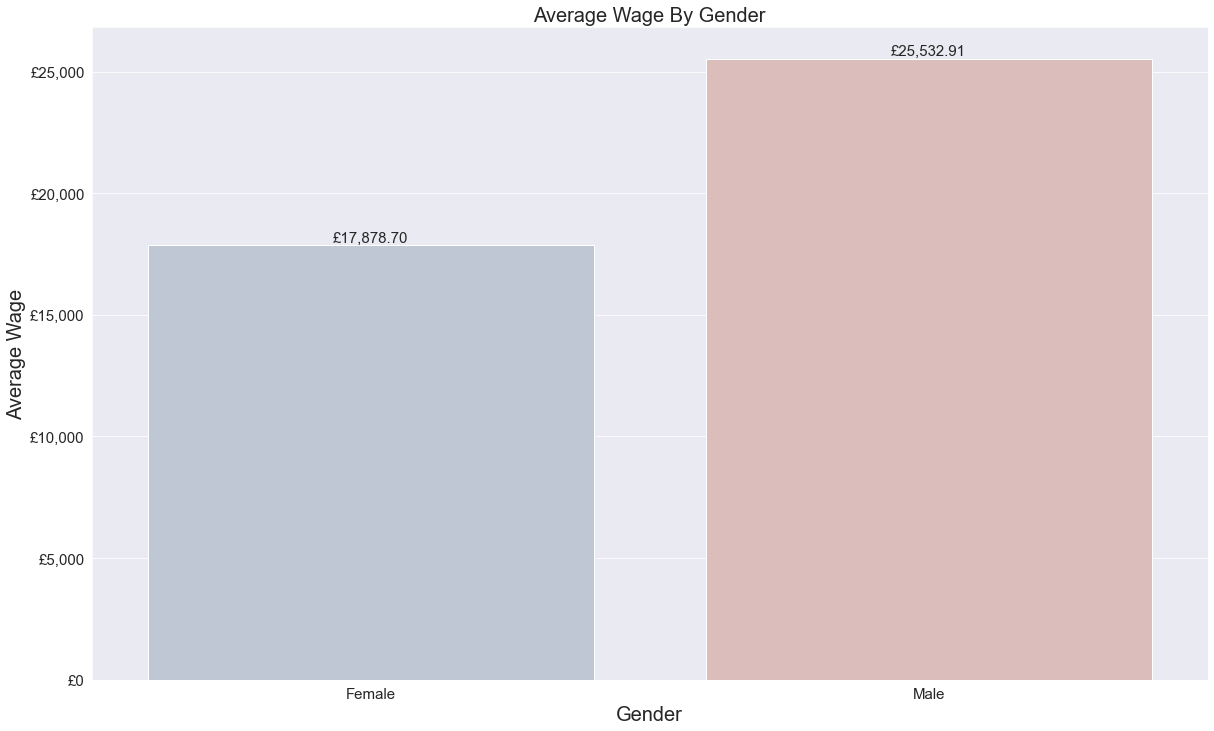

In [71]:
avg_earnf = all_time['Female AGP'].mean(skipna=True)
avg_earnm = all_time['Male AGP'].mean(skipna=True)

print(avg_earnf)
print(avg_earnm)

sns.set_style('darkgrid')

x = ['Female', 'Male']
y = [avg_earnf, avg_earnm]

ax = sns.barplot(x, y, palette = 'vlag')
container = ax.containers[0]
ax.bar_label(container, labels=['£'f'{x:,.2f}' for x in container.datavalues], fontsize = 15)

plt.title('Average Wage By Gender', fontsize=20)

#add axis titles
plt.xlabel('Gender', fontsize = 20)
plt.ylabel('Average Wage', fontsize = 20)

#fomat y-axis to include correct £ and formatting
ax.yaxis.set_major_formatter('£{x:,.0f}')

#rotate x-axis labels
plt.xticks(rotation=0, fontsize = 15)
plt.yticks(rotation=0, fontsize = 15)

plt.show()
#show_values(ax)

12.509477124183004
14.727603485838783


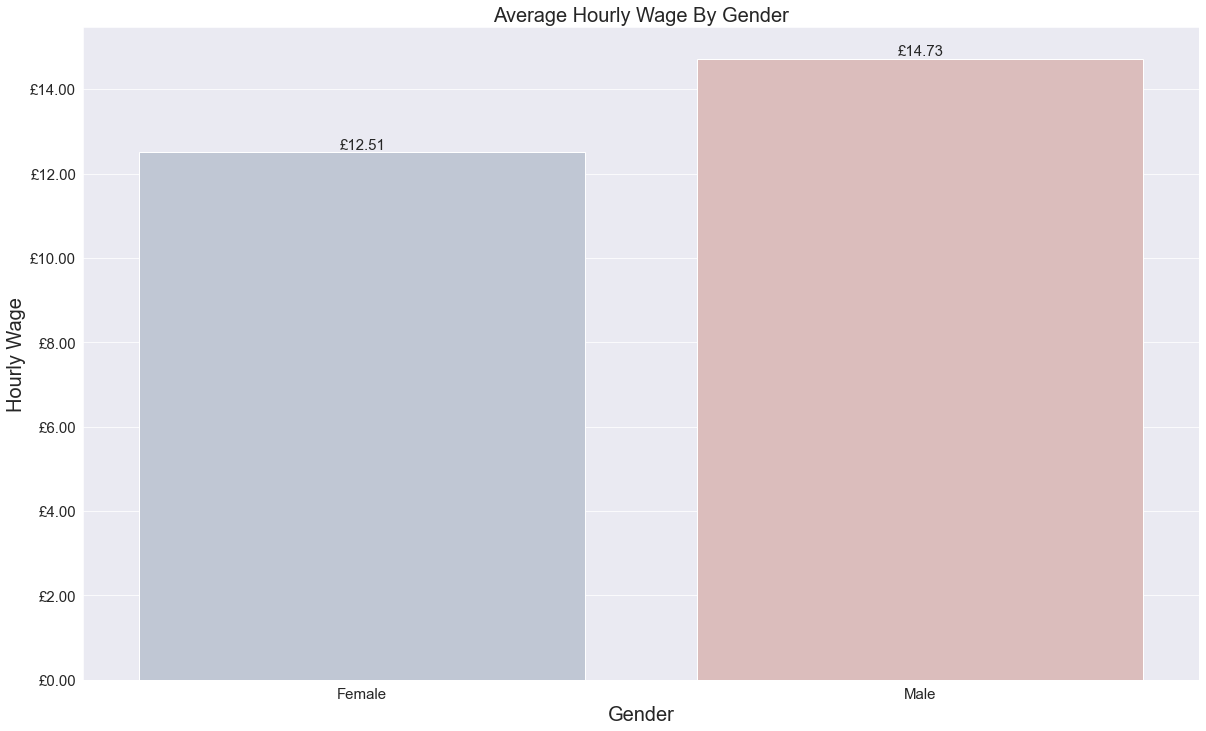

In [72]:
#average hourly wage

avg_earnhf = all_time['Female hexo'].mean(skipna=True)
avg_earnhm = all_time['Male hexo'].mean(skipna=True)

print(avg_earnhf)
print(avg_earnhm)

sns.set_style('darkgrid')

x = ['Female', 'Male']
y = [avg_earnhf, avg_earnhm]

ax = sns.barplot(x, y,palette = 'vlag')
container = ax.containers[0]
ax.bar_label(container, labels=['£'f'{x:,.2f}' for x in container.datavalues], fontsize = 15)

plt.title('Average Hourly Wage By Gender', fontsize=20)

#add axis titles
plt.xlabel('Gender', fontsize = 20)
plt.ylabel('Hourly Wage', fontsize = 20)

#fomat y-axis to include correct £ and formatting
ax.yaxis.set_major_formatter('£{x:,.2f}')

#rotate x-axis labels
plt.xticks(rotation=0, fontsize = 15)
plt.yticks(rotation=0, fontsize = 15)

plt.show()
show_values(ax)

Text(0.5, 1.0, 'Average Hourly Wage By Gender')

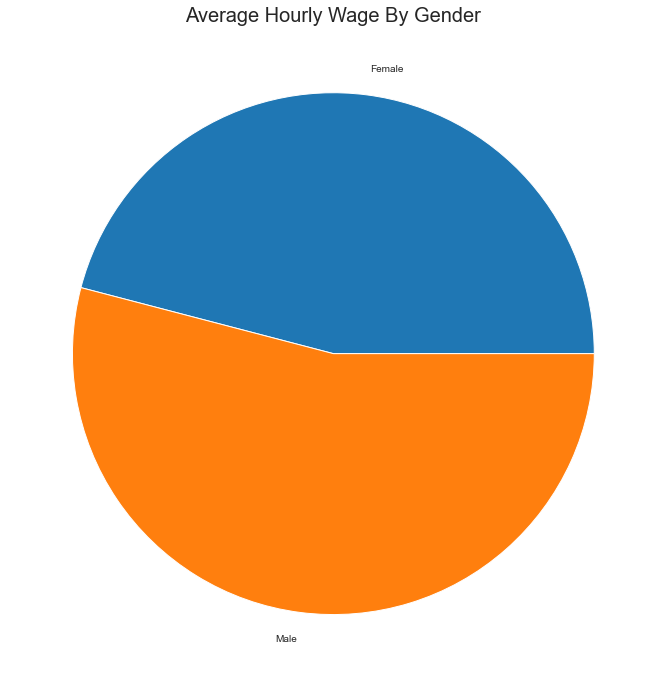

In [73]:
quantity = avg_earnhf,avg_earnhm
Gender = ['Female', 'Male']
plt.pie(quantity, labels=Gender);
plt.title('Average Hourly Wage By Gender', fontsize=20)

<AxesSubplot:xlabel='Description', ylabel='Male AGP'>

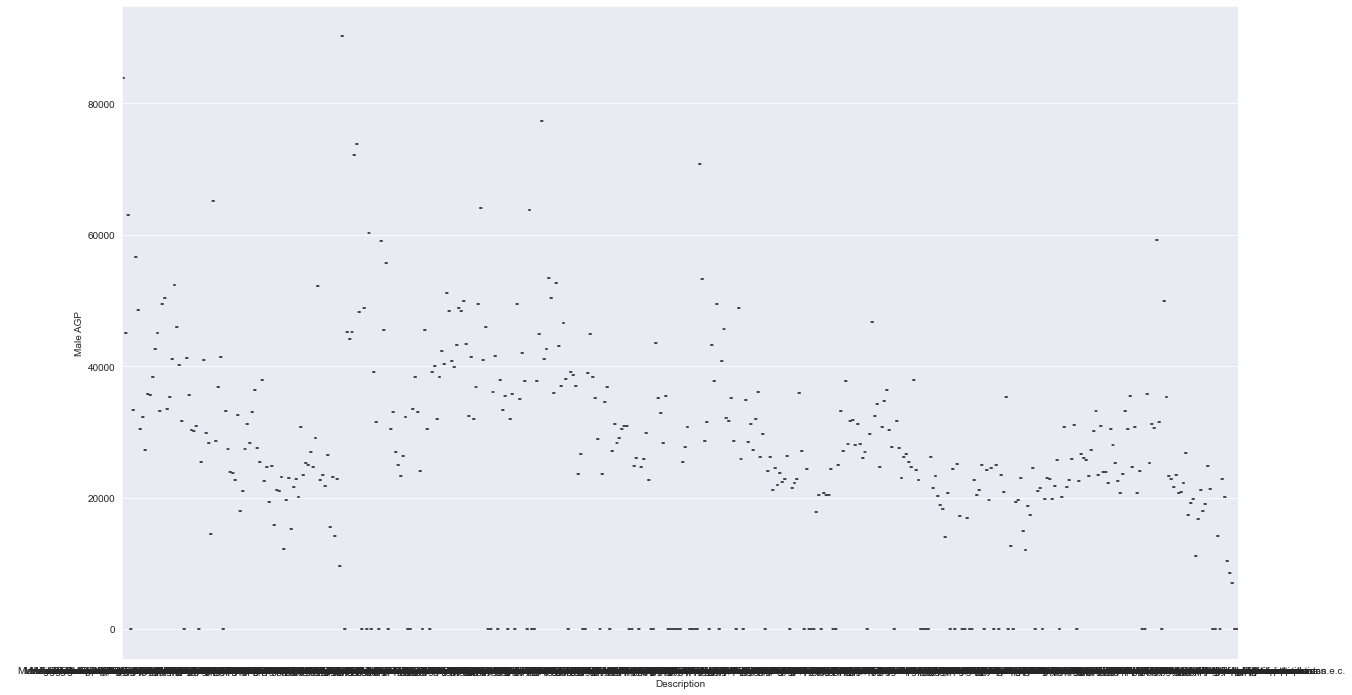

In [74]:
all_top = all_time['Male hexo'] >= 35.65
all_top_filter = all_time[all_top]
sns.boxplot(data=all_time, x='Description', y='Male AGP')

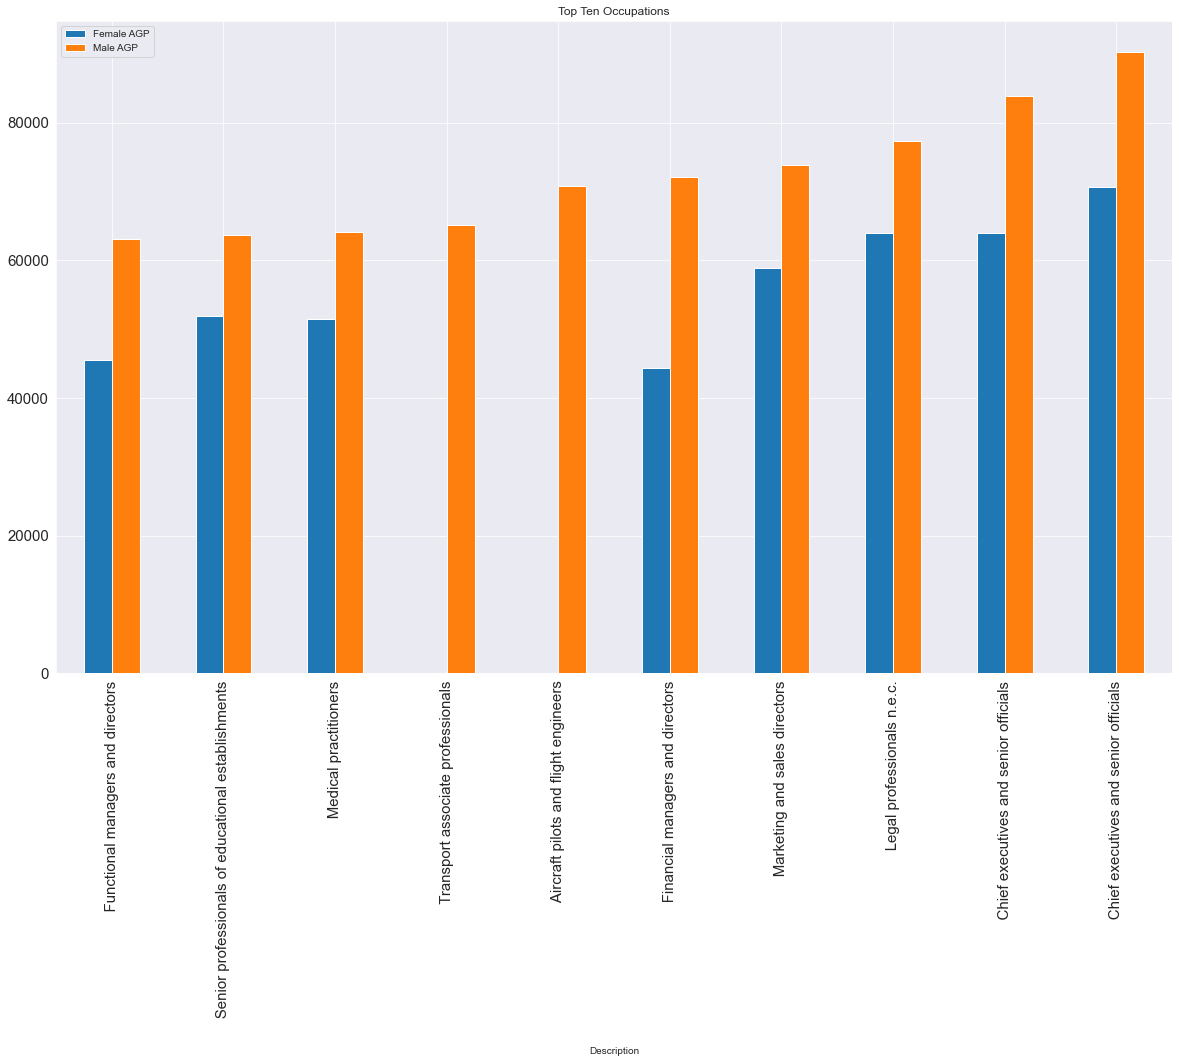

In [75]:
top_ten = all_time[['Description', 'Female AGP','Male AGP']]
top_ten_male = top_ten.groupby('Description').sum().sort_values(by='Male AGP').tail(10).plot(kind = 'bar',
                                                                                             title = 'Top Ten Occupations', 
                                                                                             legend = True,
                                                                                             rot = 90,
                                                                                             fontsize=15)

#print(top_ten_male)

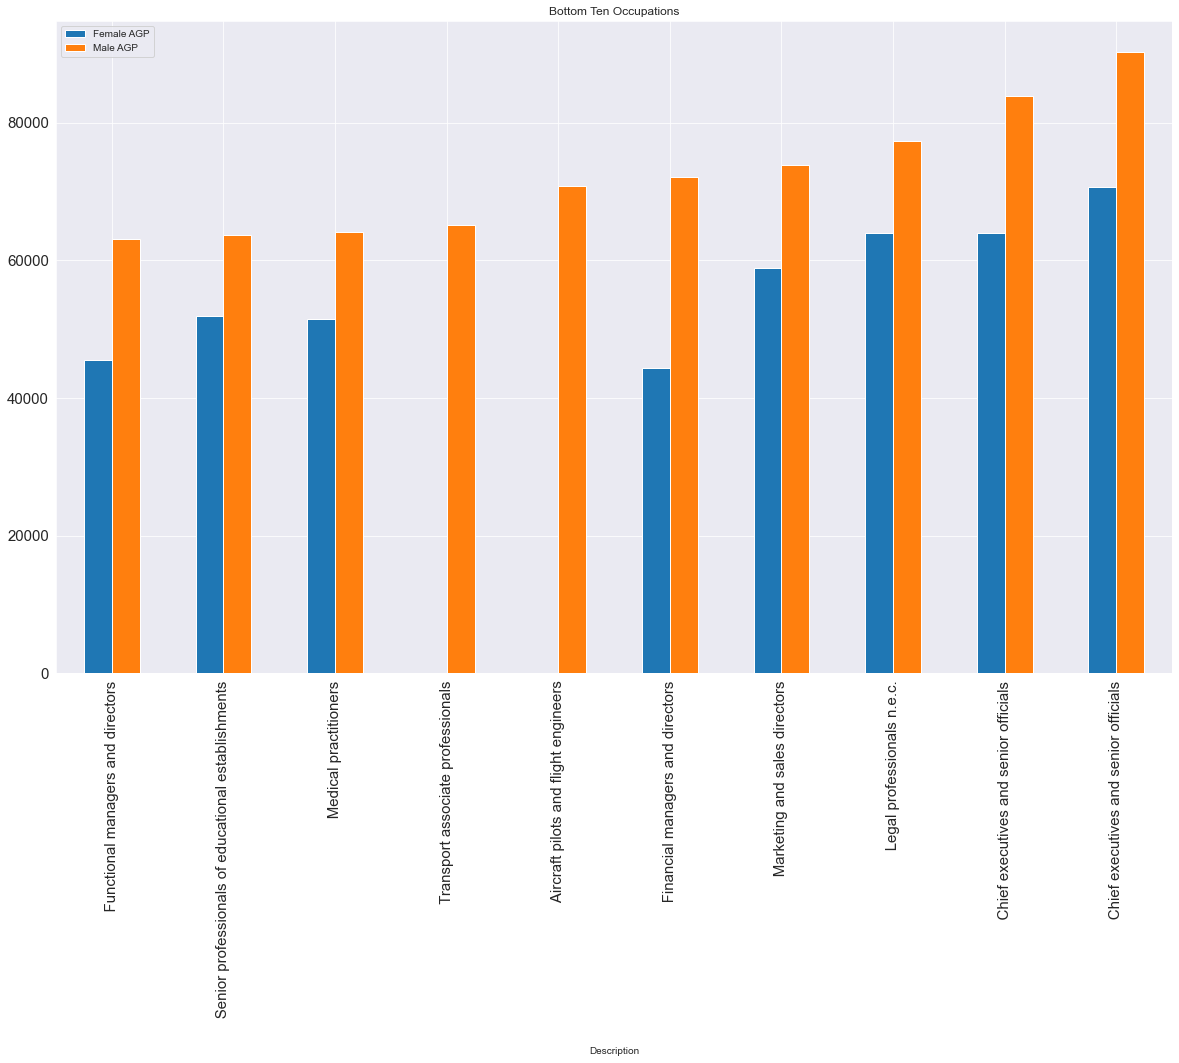

In [76]:
bottom_ten = all_time[['Description', 'Female AGP','Male AGP']]
bottom_ten_female = bottom_ten.groupby('Description').median().sort_values(by='Male AGP').tail(10).plot(kind = 'bar',
                                                                                             title = 'Bottom Ten Occupations', 
                                                                                             legend = True,
                                                                                             fontsize=15)


21829.599128540303
28073.79302832244
6057.093681917211
3023.8932461873637


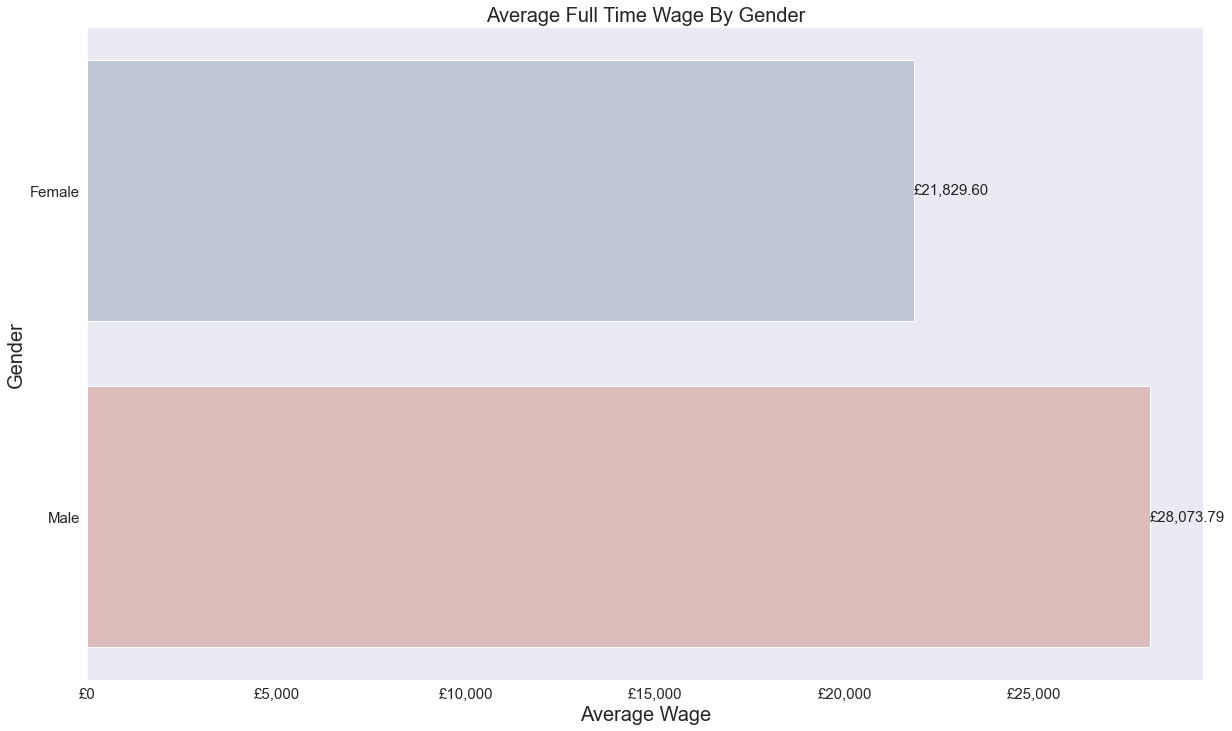

In [77]:
full_earnf = full_time['Female AGP'].mean(skipna=True)
full_earnm = full_time['Male AGP'].mean(skipna=True)
part_earnf = part_time['Female AGP'].mean(skipna=True)
part_earnm = part_time['Male AGP'].mean(skipna=True)

print(full_earnf)
print(full_earnm)
print(part_earnf)
print(part_earnm)

sns.set_style('dark')
sns.color_palette("hls", 8)

y = ['Female', 'Male']
x = [full_earnf, full_earnm]

ax = sns.barplot(x, y, palette = 'vlag')
container = ax.containers[0]
ax.bar_label(container, labels=['£'f'{x:,.2f}' for x in container.datavalues], fontsize = 15)


plt.title('Average Full Time Wage By Gender', fontsize=20)

#add axis titles
plt.xlabel('Average Wage', fontsize = 20)
plt.ylabel('Gender', fontsize = 20)

#fomat x-axis to include correct £ and formatting
ax.xaxis.set_major_formatter('£{x:,.0f}')

#rotate x-axis labels
plt.xticks(rotation=0, fontsize = 15)
plt.yticks(rotation=0, fontsize = 15)


plt.show()

6057.093681917211
3023.8932461873637


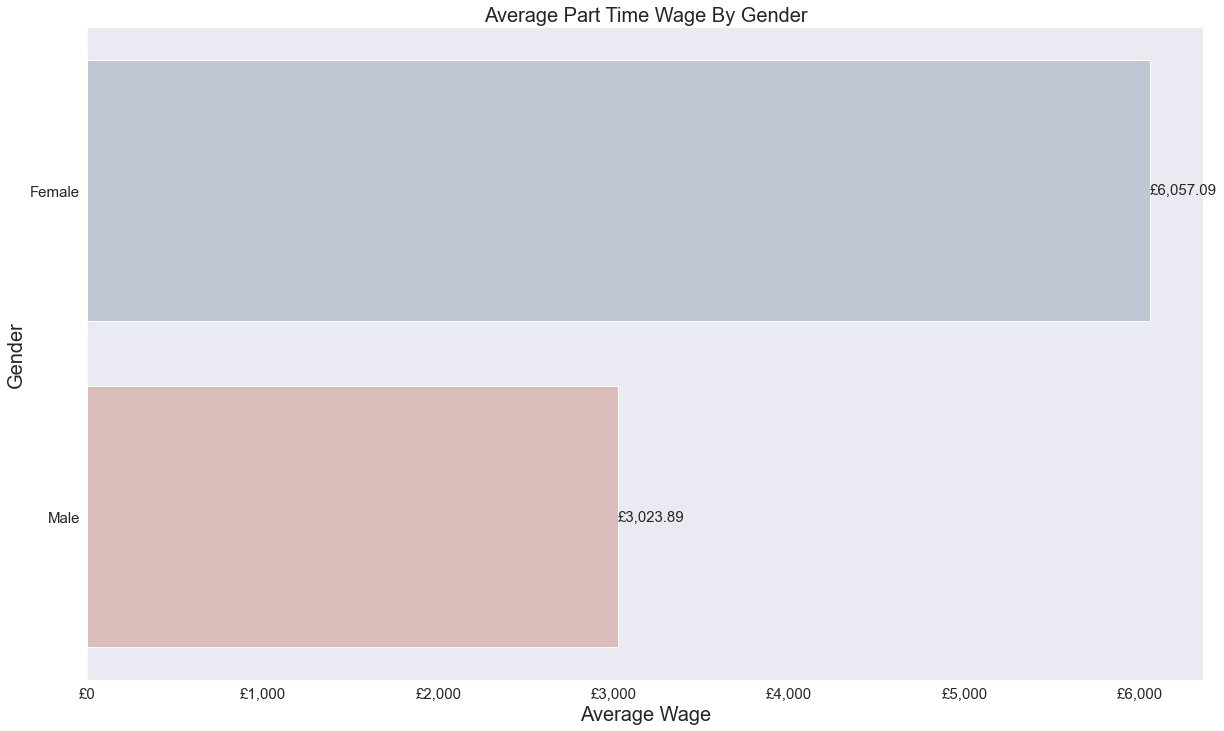

In [79]:
part_earnf = part_time['Female AGP'].mean(skipna=True)
part_earnm = part_time['Male AGP'].mean(skipna=True)


print(part_earnf)
print(part_earnm)

sns.set_style('dark')


y = ['Female', 'Male']
x = [part_earnf, part_earnm]

ax = sns.barplot(x, y, palette = 'vlag')
container = ax.containers[0]
ax.bar_label(container, labels=['£'f'{x:,.2f}' for x in container.datavalues], fontsize = 15)


plt.title('Average Part Time Wage By Gender', fontsize=20)

#add axis titles
plt.ylabel('Gender', fontsize = 20)
plt.xlabel('Average Wage', fontsize = 20)

#fomat x-axis to include correct £ and formatting
ax.xaxis.set_major_formatter('£{x:,.0f}')


#rotate x-axis labels
plt.xticks(rotation=0, fontsize = 15)
plt.yticks(rotation=0, fontsize = 15)


plt.show()

In [32]:
#sns.color_palette('k')

In [33]:
sns.color_palette('cividis')

[(0.130669, 0.231458, 0.43284),
 (0.298421, 0.332247, 0.423973),
 (0.42512, 0.431334, 0.447692),
 (0.555393, 0.537807, 0.471147),
 (0.695985, 0.648334, 0.440072),
 (0.849223, 0.771947, 0.359729)]

In [34]:
df3.Median.quantile(0.95) # 95th percentile

50483.90000000001

In [35]:
top = df3['Median'] >= 55000
abovemean = df3[top]
print(abovemean)

                                           Description  Median
0                Chief executives and senior officials   90000
4                     Financial managers and directors   64384
5                        Marketing and sales directors   75631
7           Advertising and public relations directors   64641
9          Information technology and telecommunica...   63810
14                              Senior police officers   58734
51                               Medical practitioners   64504
69         Senior professionals of educational esta...   59841
73                          Legal professionals n.e.c.   76522
130                                            Brokers   66813
303                             Train and tram drivers   59198


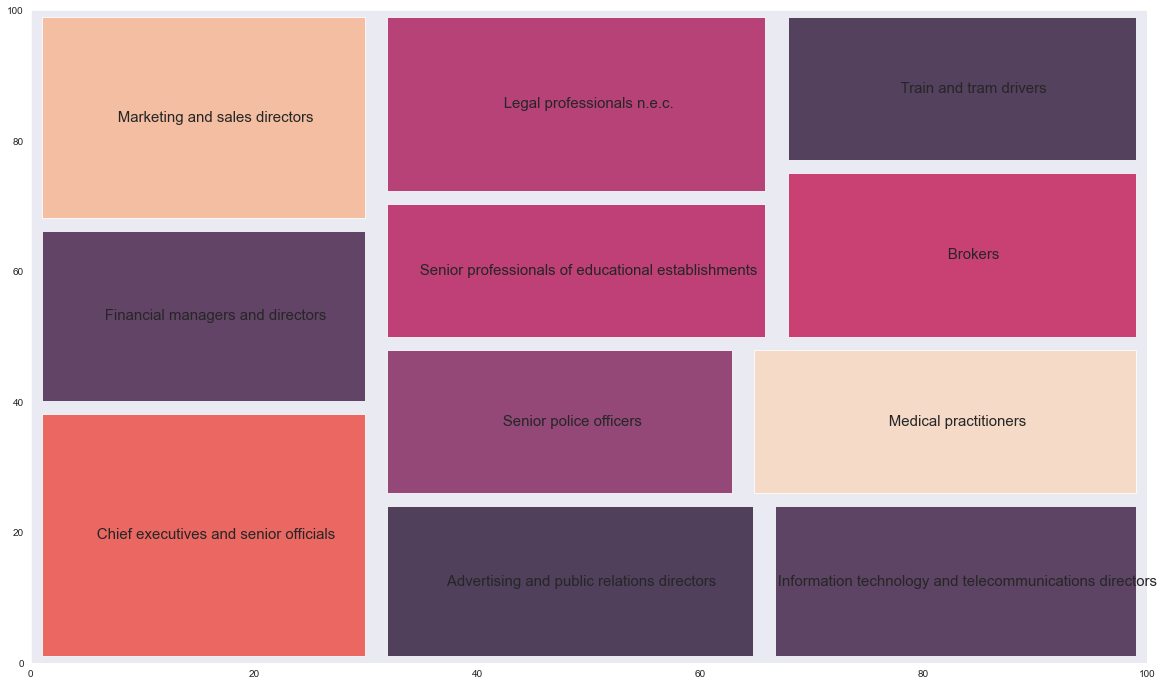

In [80]:
import squarify
sizes = abovemean['Median']
label = abovemean['Description']
colors=['purple','orange','blue','green']
squarify.plot(sizes=sizes, label=label, alpha=.8, pad = True, text_kwargs={'fontsize':15} )

plt.show()

In [82]:
middle = df3["Median"].between(45000, 50000, inclusive = True)  
middlemean = df3[middle]
print(middlemean)

                                           Description  Median
1          Production managers and directors in man...   48260
2          Production managers and directors in con...   45977
3          Production managers and directors in min...   45000
6                    Purchasing managers and directors   47092
8                Human resource managers and directors   47923
11         Financial institution managers and direc...   45351
38                               Electronics engineers   49367
42                              IT specialist managers   48053
44         IT business analysts, architects and sys...   49510
50                   Research and development managers   48623
77             Actuaries, economists and statisticians   48952
82                                  Quantity surveyors   45063
142        Sales accounts and business development ...   46203
194        Rail and rolling stock builders and repa...   46753
306                          Rail transport operatives 

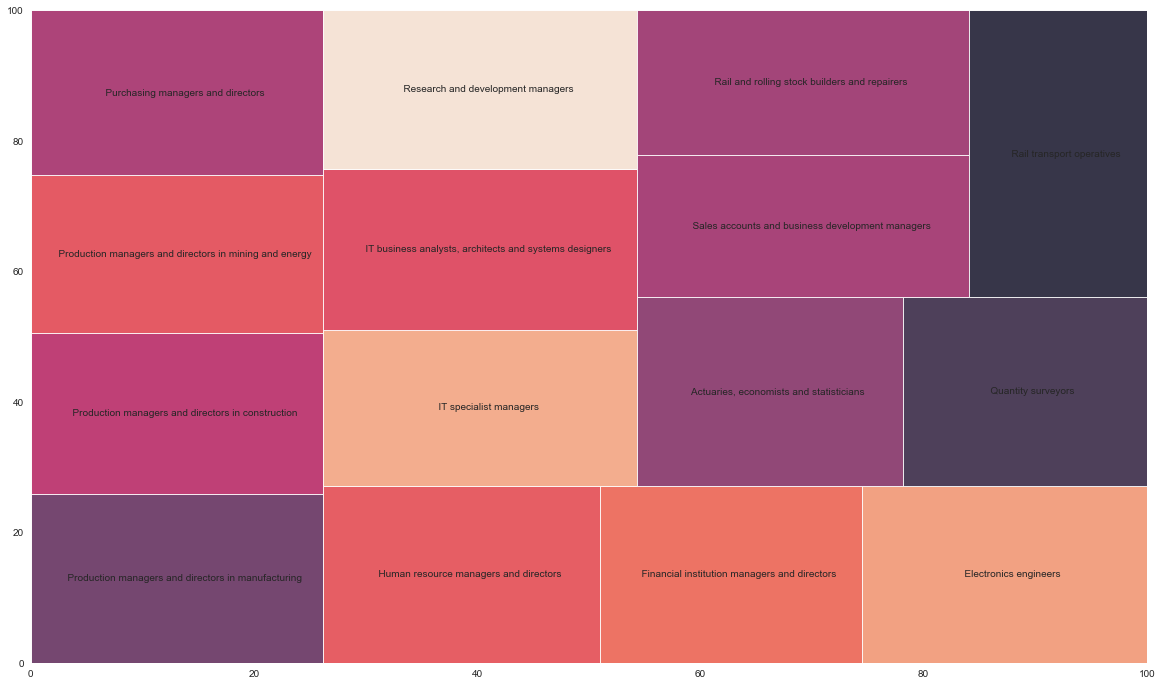

In [81]:
sizes = middlemean['Median']
label = middlemean['Description']
squarify.plot(sizes=sizes, label=label, alpha=.8 )
plt.show()

In [39]:
print(df4)

    Year  10 percentile  Median  90 percentile
0   1997           13.6    17.4           20.7
1   1998           13.0    17.4           21.2
2   1999           12.6    16.4           20.2
3   2000           11.8    16.3           20.3
4   2001           11.4    16.4           21.8
5   2002           11.5    15.5           21.8
6   2003           10.7    14.6           21.1
7   2004            8.7    14.5           19.8
8   2005            8.1    13.0           19.2
9   2006            7.0    12.8           20.6
10  2007            7.4    12.5           20.7
11  2008            7.5    12.6           21.5
12  2009            7.6    12.2           20.3
13  2010            6.5    10.1           19.3
14  2011            5.9    10.5           20.8
15  2012            6.1     9.5           18.9
16  2013            6.6    10.0           20.5
17  2014            5.9     9.6           18.4
18  2015            6.3     9.6           18.6
19  2016            5.0     9.4           19.0
20  2017     

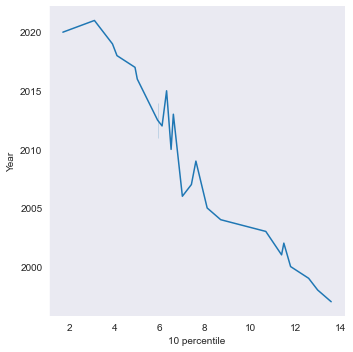

In [83]:
sns.relplot(data=df4, x='10 percentile', y='Year', kind='line', 
            dashes=False, markers=True)

Text(0.5, 1.0, 'Percentile Difference In Pay Between Genders')

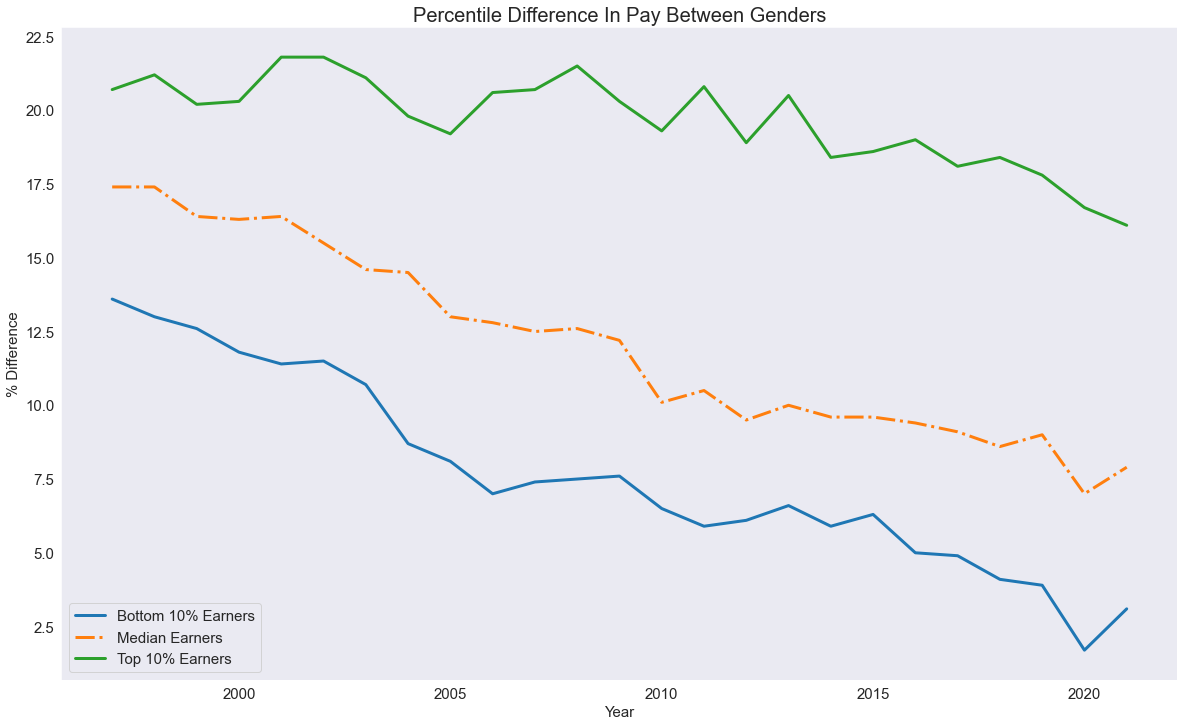

In [86]:
x = df4['Year']
y =df4['10 percentile']
y1 =df4['Median']
y2 =df4['90 percentile']


plt.plot(x, y, label = 'Bottom 10% Earners', linestyle = 'solid', linewidth = 3)
plt.plot(x, y1, label = 'Median Earners', linestyle = 'dashdot', linewidth = 3)
plt.plot(x, y2, label = 'Top 10% Earners', linestyle = 'solid', linewidth = 3)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('% Difference', fontsize = 15)

plt.xticks(ticks=None, labels=None,fontsize = 15)
plt.yticks(ticks=None, labels=None,fontsize = 15)

fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(yticks)


plt.legend(loc='lower left', fontsize = 15)
plt.title('Percentile Difference In Pay Between Genders', fontsize = 20)

In [42]:
print(df2)

    age group  18 to 21  22 to 29  30 to 39  40 to 49  50 to 59  over 60
0        1997       6.0       5.8      11.0      24.0      21.6     14.7
1        1998       6.7       5.6      10.6      24.8      21.6     17.3
2        1999       7.5       5.8       9.9      23.5      21.7     14.5
3        2000       5.7       5.2      10.2      22.9      21.0     13.2
4        2001       4.7       4.9       9.4      23.3      21.0     12.8
5        2002       5.3       3.2       8.8      22.3      21.9     14.0
6        2003       3.4       1.7       9.5      21.8      20.2     10.6
7        2004       3.5       0.5       8.9      20.9      19.8      7.3
8        2005       2.2      -0.5       8.3      19.9      16.6      7.5
9        2006       2.1       0.3       7.1      18.7      16.6      7.9
10       2007       1.5       0.2       6.3      19.1      17.6      8.0
11       2008       3.0       0.0       6.7      19.5      17.9      9.9
12       2009       2.1       0.5       6.1      18

Text(0.5, 1.0, 'Percentile Difference In Age')

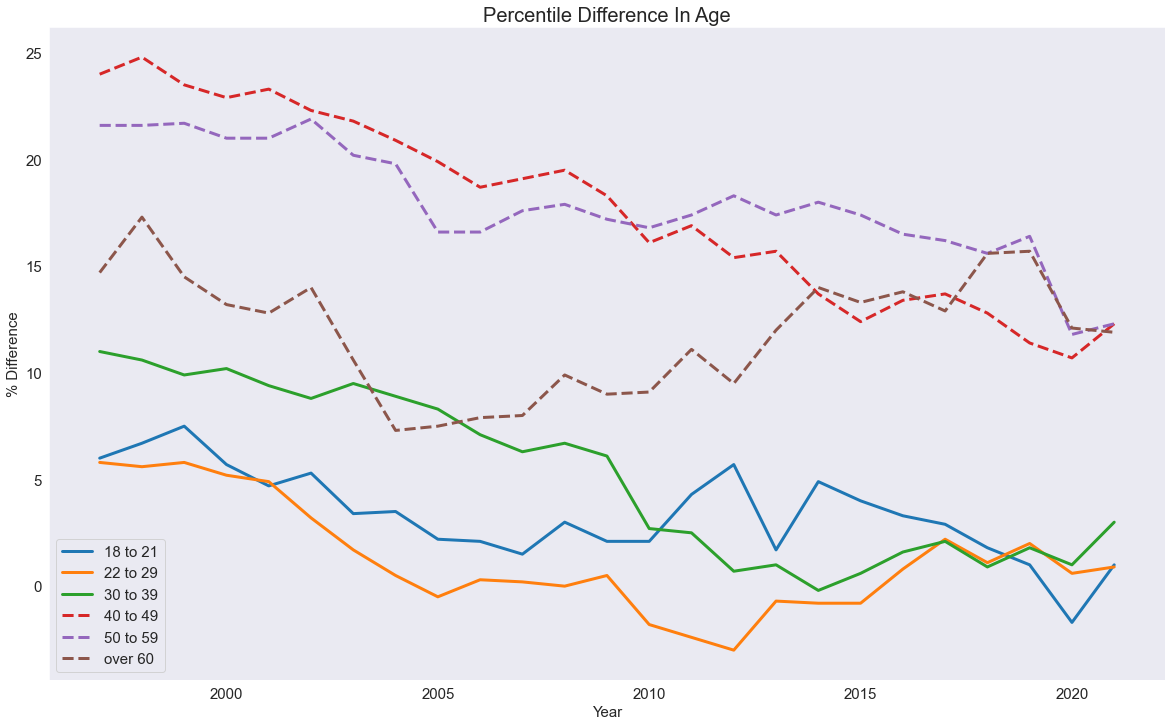

In [85]:
a = df2['age group']
b = df2['18 to 21']
b1 =df2['22 to 29']
b2 =df2['30 to 39']
b3 =df2['40 to 49']
b4 =df2['50 to 59']
b5 =df2['over 60']


plt.plot(a, b, label = '18 to 21', linestyle = 'solid', linewidth = 3)
plt.plot(a, b1, label = '22 to 29', linestyle = 'solid', linewidth = 3)
plt.plot(a, b2, label = '30 to 39', linestyle = 'solid', linewidth = 3)
plt.plot(a, b3, label = '40 to 49', linestyle = 'dashed', linewidth = 3)
plt.plot(a, b4, label = '50 to 59', linestyle = 'dashed', linewidth = 3)
plt.plot(a, b5, label = 'over 60', linestyle = 'dashed', linewidth = 3)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('% Difference', fontsize = 15)

plt.xticks(ticks=None, labels=None,fontsize = 15)
plt.yticks(ticks=None, labels=None,fontsize = 15)

fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(yticks)


plt.legend(loc='lower left', fontsize = 15)
plt.title('Percentile Difference In Age', fontsize = 20)

In [44]:
#mean = all_time.groupby('Description', as_index=False)['Male AGP'].mean()

In [45]:
#all_time.sort_values(['Description', 'Male AGP'], ascending=False).groupby('Male AGP').head(10)

In [46]:
#all_time.groupby('Description').sum().sort_values(by='Male AGP').tail(10)

In [47]:
#result = all_time.groupby('Description').sum().sort_values(by='Male AGP').tail(10)
#sns.barplot(x = result.index, y = result.values)